# Бинарная классификация. Случай линейно разделимых классов

In [248]:
import numpy as np

file = open('ex2data1.txt', 'r')

first_exam_scores = []
second_exam_scores = []
is_admitted_results = []

for line in file:
    f, s, r = line.split(',')
    first_exam_scores.append(float(f))
    second_exam_scores.append(float(s))
    is_admitted_results.append(int(r))

data = {
    'first_exam_scores': np.array(first_exam_scores),
    'second_exam_scores': np.array(second_exam_scores),
    'is_admitted_results': np.array(is_admitted_results),
}

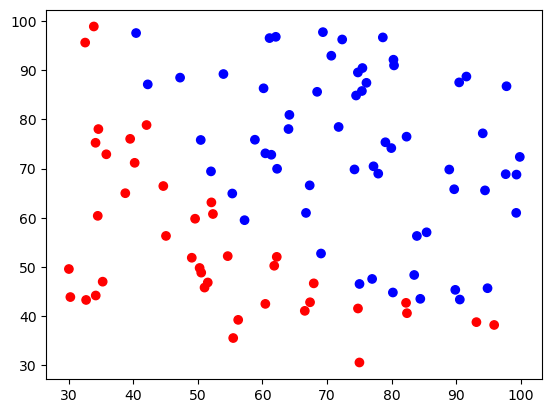

In [249]:
import matplotlib.pyplot as plt

colors = ['red', 'blue']

plt.scatter(
    data['first_exam_scores'],
    data['second_exam_scores'],
    c=[colors[i] for i in data['is_admitted_results']])
plt.show()

In [250]:
m = data['first_exam_scores'].shape[0]
X = np.column_stack((np.ones(m), data['first_exam_scores'], data['second_exam_scores']))
y = data['is_admitted_results']
theta = np.array([0, 0, 0])

In [251]:
def sigmoid(z):
    return 1 / (1 + np.exp(-1 * z))

In [252]:
def costFunction(theta, X, y):
    m = X.shape[0]
    predicts = sigmoid(X @ theta)
    cost = -1 * np.mean(y * np.log(predicts) + (1 - y) * np.log(1 - predicts))
    return cost

In [253]:
test_cost = costFunction(theta, X, y)
test_cost

0.6931471805599453

In [254]:
def gradientFunc(theta, X, y):
    m = X.shape[0]
    predicts = sigmoid(X @ theta)
    primes = (1/m) * (X.T @ (predicts - y))
    return primes

In [255]:
test_primes = gradientFunc(theta, X, y)
test_primes

array([ -0.1       , -12.00921659, -11.26284221])

In [256]:
import scipy.optimize as opt

result = opt.fmin_tnc(
    func = costFunction,
    x0 = theta,
    fprime = gradientFunc,
    args = (X, y))
theta_optimized = result[0]
print(theta_optimized)

[-25.1613184    0.20623159   0.20147148]


  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631300E-01   7.89087138E-01
    2    5  5.892425204867887E-01   7.39226767E+01
    3    7  4.227823942372852E-01   1.85265614E+01
    4    9  4.072926978103789E-01   1.68671117E+01
    5   11  3.818854817088048E-01   1.07735119E+01
    6   13  3.786234819063554E-01   2.31584917E+01
tnc: stepmx = 1000
    7   16  2.389268257879818E-01   3.00822167E+00
    8   18  2.047203900940446E-01   1.52228440E-01
    9   20  2.046713903972100E-01   6.62496069E-02
   10   22  2.035303159988414E-01   9.30782060E-04
tnc: fscale = 32.7775
   11   24  2.035293518891179E-01   8.07146854E-06
   12   26  2.035251109690735E-01   1.80213083E-04
   13   28  2.034984128882035E-01   5.02991772E-04
   14   30  2.034978399403426E-01   1.00425642E-05
   15   32  2.034977917155916E-01   3.81006314E-06
   16   34  2.034977396667134E-01   1.97307513E-05
   17   36  2.034977015894756E-01   2.17023564E-13


/tmp/ipykernel_75837/1688158677.py:7: RuntimeWarning: invalid value encountered in divide
  x2 = (-theta[0] - theta[1] * x1) / (theta[2] * 0.01)


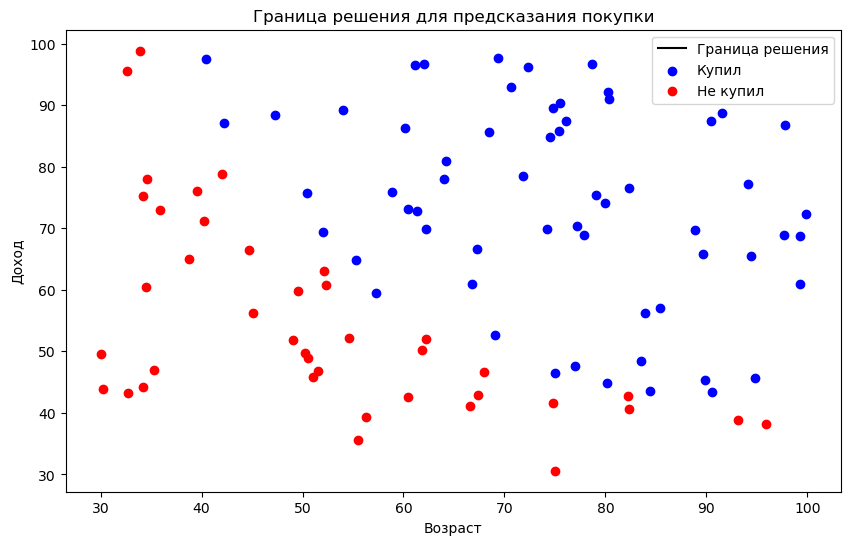

In [257]:
# Построение границы решения (линия)
x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
x2_min, x2_max = X[:, 2].min(), X[:, 2].max()

# Находим координаты двух точек на границе решения
x1 = np.array([x1_min, x1_max])
x2 = (-theta[0] - theta[1] * x1) / (theta[2] * 0.01)

# Рисуем границу решения (линию)
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'k-', label='Граница решения') 
plt.scatter(X[:, 1][y.ravel() == 1], X[:, 2][y.ravel() == 1], c='blue', label='Купил')
plt.scatter(X[:, 1][y.ravel() == 0], X[:, 2][y.ravel() == 0], c='red', label='Не купил')

plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.title('Граница решения для предсказания покупки')
plt.legend()
plt.show()